# Problem Statement

### To forecast number of error in a machine by using time series analysis with daily machine error log file from 2014 to 2018 June.

# Steps to Tackle a Time Series Problem

## Step 1: Visualize the Time Series

### Creating Pandas DataFrames

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [58]:
data = pd.read_csv('APB01_ErrorList.csv')

print('\n First 5 days data:\n', data.head(5))


print('\n Last 5 days data:\n', data.tail(5))


print('\n Data Shape: (row x col)', data.shape)

print('\n Data Dim: ', data.ndim)

print('\n Data Types:\n', data.dtypes)

print('\n Data null:\n', data.isnull().sum())

rms_dict={}


 First 5 days data:
          Date  Error
0  2014-01-01      0
1  2014-01-02     14
2  2014-01-03    112
3  2014-01-04      0
4  2014-01-05      0

 Last 5 days data:
             Date  Error
1637  2018-06-26     20
1638  2018-06-27     38
1639  2018-06-28     48
1640  2018-06-29     46
1641  2018-06-30     49

 Data Shape: (row x col) (1642, 2)

 Data Dim:  2

 Data Types:
 Date     object
Error     int64
dtype: object

 Data null:
 Date     0
Error    0
dtype: int64


## Reading as datetime format:

In [60]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('2017-01-01')
data = pd.read_csv('APB01_ErrorList.csv',  index_col='Date',date_parser=dateparse)
data.head()

,Error
Date,
2014-01-01,0
2014-01-02,14
2014-01-03,112
2014-01-04,0
2014-01-05,0


In [61]:
print(data[data['Error']==0])

            Error
Date             
2014-01-01      0
2014-01-04      0
2014-01-05      0
2014-01-11      0
2014-01-12      0
2014-01-18      0
2014-01-19      0
2014-02-02      0
2014-02-12      0
2014-02-13      0
2014-02-14      0
2014-02-15      0
2014-02-16      0
2014-02-17      0
2014-02-22      0
2014-02-23      0
2014-02-25      0
2015-06-02      0
2015-12-21      0
2015-12-22      0
2016-06-15      0
2017-06-12      0
2017-06-13      0
2017-06-14      0
2017-06-15      0
2017-06-16      0
2017-06-17      0
2017-06-18      0
2017-06-19      0
2017-06-20      0
2017-06-21      0
2017-06-22      0
2017-06-23      0
2017-06-24      0
2017-06-25      0
2017-06-26      0
2017-06-27      0
2017-06-28      0
2017-06-29      0
2017-06-30      0
2017-07-01      0
2017-07-02      0
2017-07-03      0
2017-07-04      0


In [62]:
data['Error'].replace([0], 46, inplace=True)
print(data[data['Error']==0])

Empty DataFrame
Columns: [Error]
Index: []


In [63]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

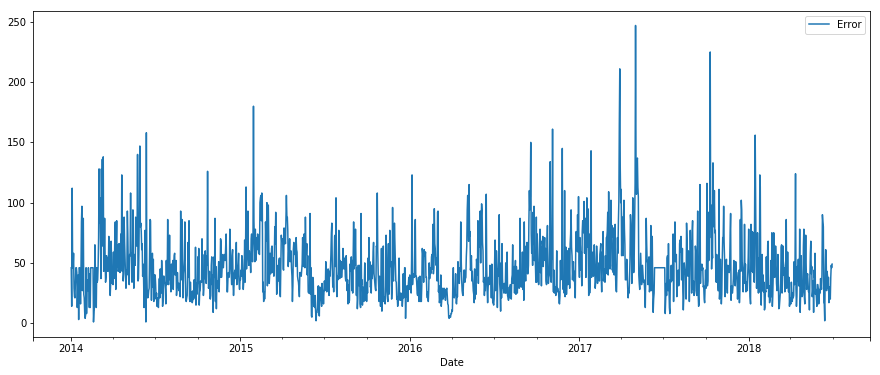

In [64]:
data.plot()

In [65]:
#data['2017-03':'2017-03-31'].plot()

#data[:31]

In [66]:
#data.drop(data.isnull().index, inplace=True)
#data_error = data.loc[~(data['Error'] <1 )]
#print('Date with error:\n', data_error)





In [67]:
data.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
               '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28',
               '2018-06-29', '2018-06-30'],
              dtype='datetime64[ns]', name='Date', length=1642, freq=None)

In [68]:
data.describe()

,Error
count,1642.000000
mean,46.700365
std,26.116467
min,1.000000
25%,29.000000
50%,42.000000
75%,58.750000
max,247.000000


## Decompose Time Series Data into Trend and Seasonality

### Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Time Series Components
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.

Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.

### Daily Decompose

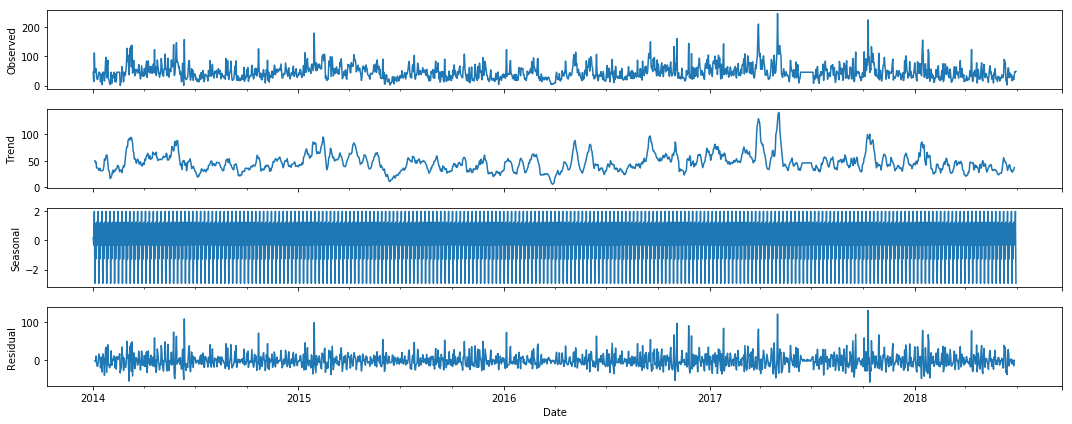

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result_decompose = seasonal_decompose(data, model='additive')
result_decompose.plot()
pyplot.show()

## Step 2: Stationarize the Series

### Function for testing stationarity

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=5,center=False).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=5,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Daily test stationarity

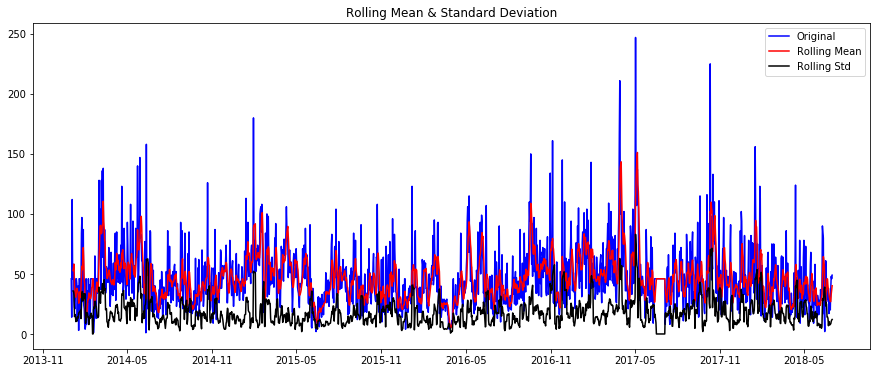

Results of Dickey-Fuller Test:
Test Statistic                -8.731467e+00
p-value                        3.183148e-14
#Lags Used                     8.000000e+00
Number of Observations Used    1.633000e+03
Critical Value (1%)           -3.434361e+00
Critical Value (5%)           -2.863312e+00
Critical Value (10%)          -2.567713e+00
dtype: float64


In [71]:
ts = data['Error']
test_stationarity(ts)

#### Dickey-Fuller Test: 
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

## Step 2-1 Making TS Stationary


### Estimating & Eliminating Trend and Seasonality

### 2-1 (a) Smoothing: Moving Average (MA)

* Introduction:

    A simple moving average is calculated by adding up the last ‘n’ period’s values and then dividing that number by ‘n’. So the moving average value is considering as the forecast for next period.

    A moving average is used to smooth out irregularities (peaks and valleys) to easily recognize trends.
    
    The larger the interval, the more the peaks, and valleys are smoothed out. The smaller the interval, the closer the moving averages are to the actual data points. The SMA is basically deal with historical data having more and more peak and valleys. Probably it would be stock data, retail data etc.

### 2-1 (b) Exponential Smoothing

#### Introduction:

* Exponential Smoothing assigns exponentially decreasing weights as the observation get older.
    
* Exponential smoothing is usually a way of “smoothing” out the data by removing much of the “noise” (random effect) 
    from the data by giving a better forecast.
    
* Types of Exponential Smoothing Methods:
    a) Simple Exponential Smoothing
        If you have a time series that can be described using an additive model with constant level and no seasonality, 
        you can use simple exponential smoothing to make short-term forecast.
        
    b) Holt’s Exponential Smoothing
        If you have a time series that can be described using an additive model with increasing or decreasing trend 
        and no seasonality, you can use Holt’s exponential smoothing to make short-term forecasts.
        
    c) Winters’ Three Parameter Linear and Seasonal Exponential Smoothing
        If you have a time series that can be described using an additive model with increasing or decreasing trend 
        and seasonality, you can use Holt-Winters exponential smoothing to make short-term forecasts.
        
* Larger the alpha, closer to the actual data points and vice versa. This method is suitable for 
    forecasting data with no trend or seasonal pattern (alpha = Smoothing Constant).
    

### 2-1 (c) Differencing

## Autocorrelation
#### Autocorrelation is a measure of how correlated a variable is with itself.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples of autocorrelation include:

In stock market data, the stock price at one point is correlated with the stock 
price of the point that's directly prior in time. 

In sales data, sales on a Saturday are likely correlated with 
sales on the next Saturday and the previous Saturday, as well as other days, to more
or less of an extent.


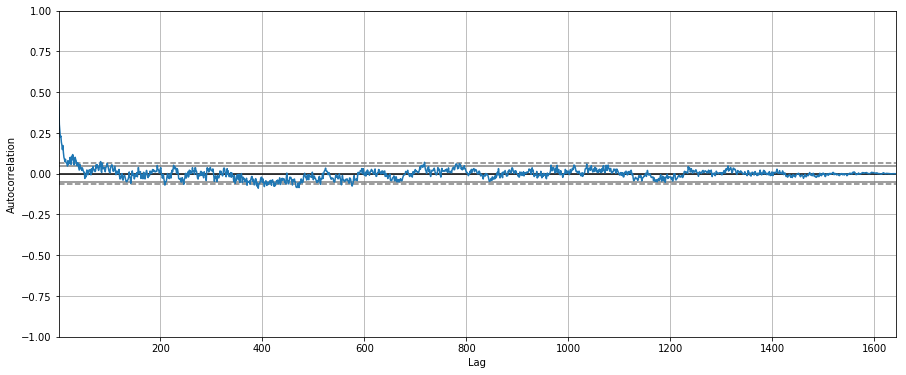

In [72]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data.Error)

In [73]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

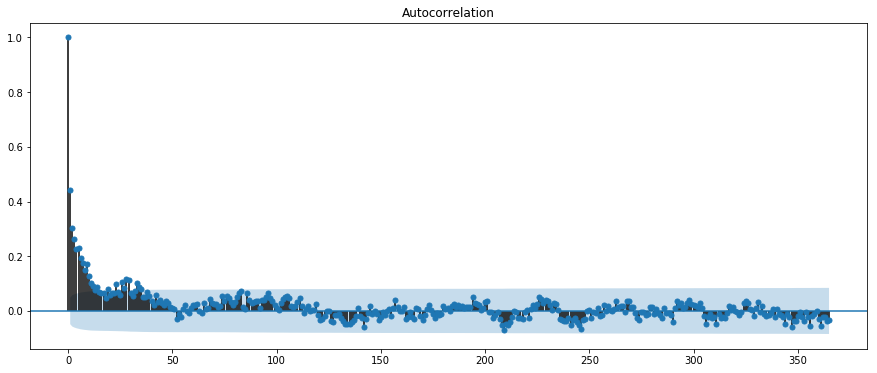

In [131]:
plot_acf(data.Error.values, lags=365)
plt.show()

# Step 3: Modelling

## 3-0: Naive Method

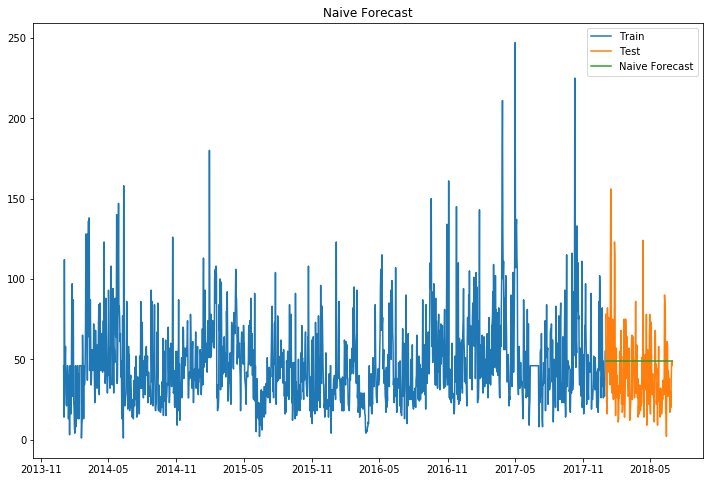

In [178]:
train = data['2014':'2017']
test = data['2018']

dd= np.asarray(data.Error)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Error'], label='Train')
plt.plot(test.index,test['Error'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [181]:
rms = sqrt(mean_squared_error(test.Error, y_hat.naive))
print(rms)

rms_dict['Daily_Naive_RMS'] = rms

25.36005908283896


## 3-1: Simple Average

In [182]:
train = data['2014':'2017']
test = data['2018']

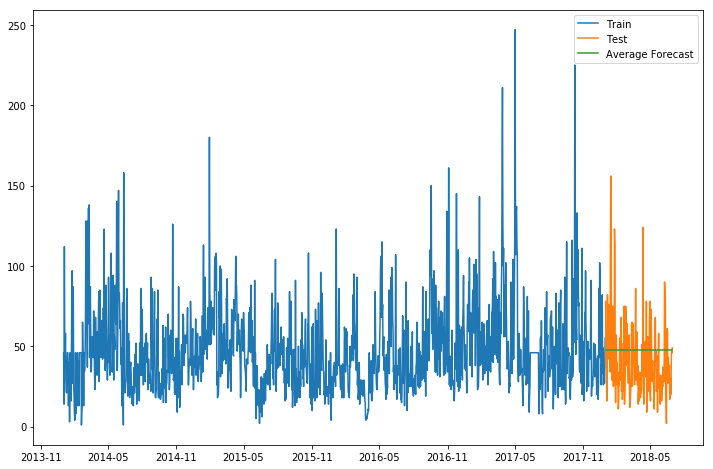

In [183]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Error'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [77]:
from  sklearn.metrics  import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Error, y_hat_avg.avg_forecast))
print(rms)

rms_dict['Daily_SA_RMS'] = rms

24.8986748071299


## 3-2: Moving Average

In [78]:
train = data['2014':'2017']
test = data['2018']

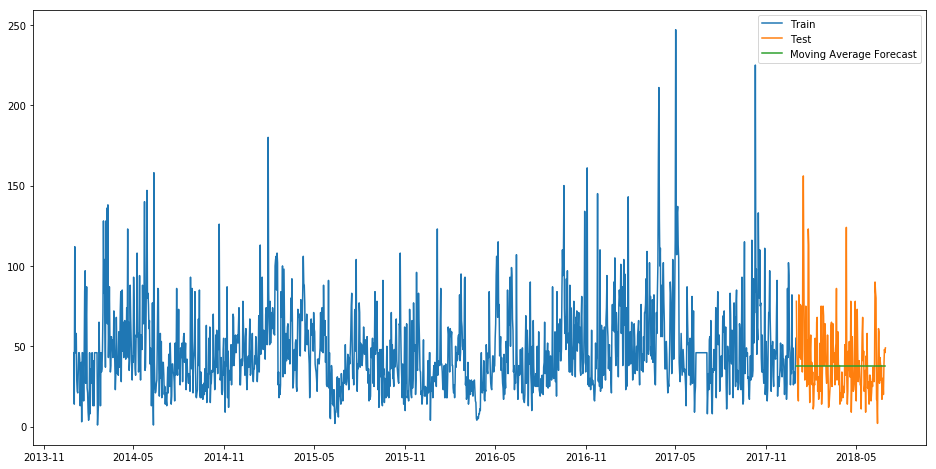

In [134]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Error'].rolling(7).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [80]:
rms = sqrt(mean_squared_error(test.Error, y_hat_avg.moving_avg_forecast))
print(rms)

rms_dict['Daily_MA_RMS'] = rms

24.230756803621368


## 3-3: Simple Exponential Smoothing

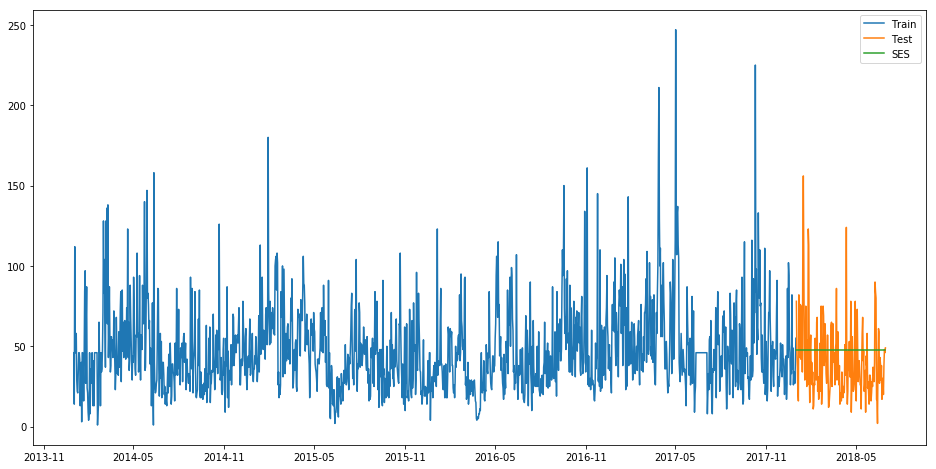

In [81]:
# pip install --user -U statsmodels
# python -m pip install --user statsmodels

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Error'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [82]:
rms = sqrt(mean_squared_error(test.Error, y_hat_avg.SES))
print(rms)

rms_dict['Daily_SimpleExponential_RMS'] = rms

24.945840700688457


## 3-4: Holt's Linear Trend

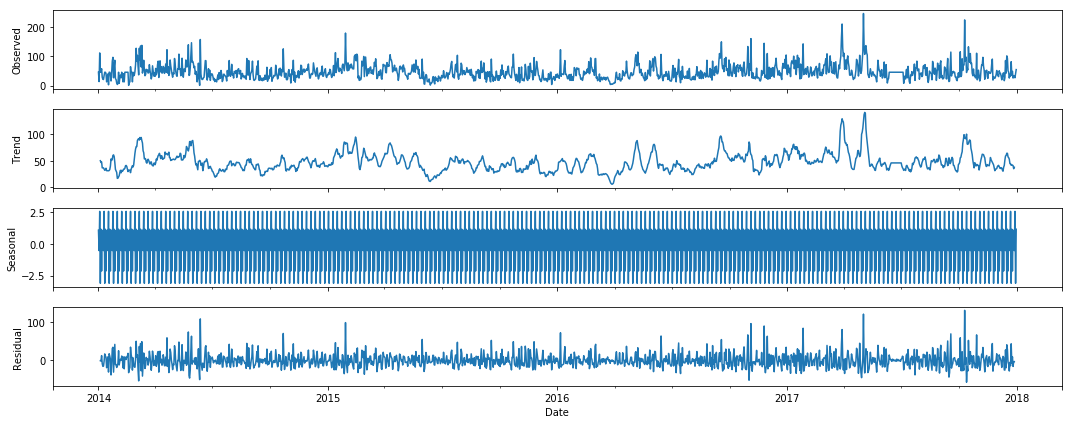

In [83]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Error).plot()
result = sm.tsa.stattools.adfuller(train.Error)
plt.show()

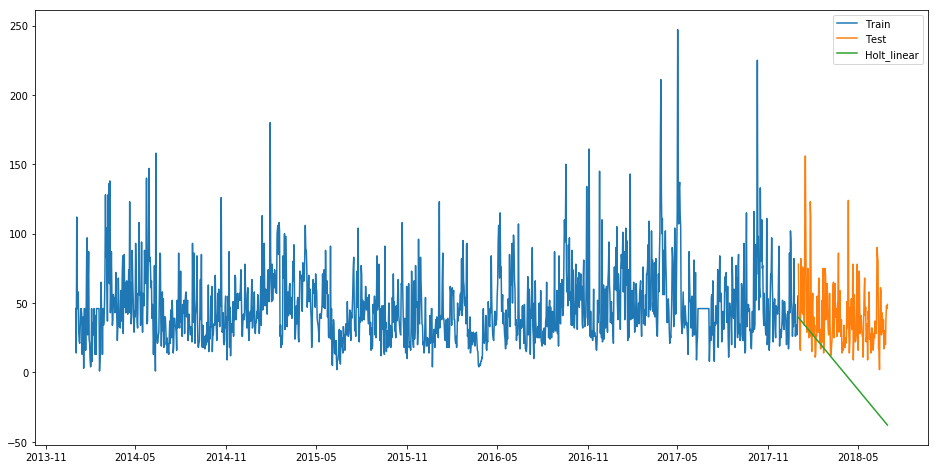

In [84]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Error'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [85]:
rms = sqrt(mean_squared_error(test.Error, y_hat_avg.Holt_linear))
print(rms)

rms_dict['Daily_HoltLinearTrend_RMS'] = rms

49.41007924939043


## 3-5 Holt-Winters Method

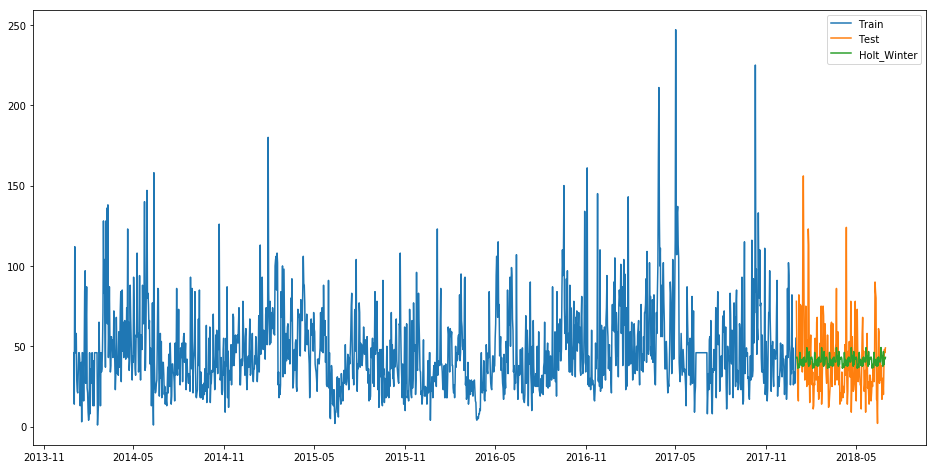

In [137]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Error']) ,seasonal_periods=30 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [138]:
rms = sqrt(mean_squared_error(test.Error, y_hat_avg.Holt_Winter))
print(rms)

rms_dict['Daily_HoltWinters_RMS'] = rms

24.52784679789504


 ## 3-6: SARIMA

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


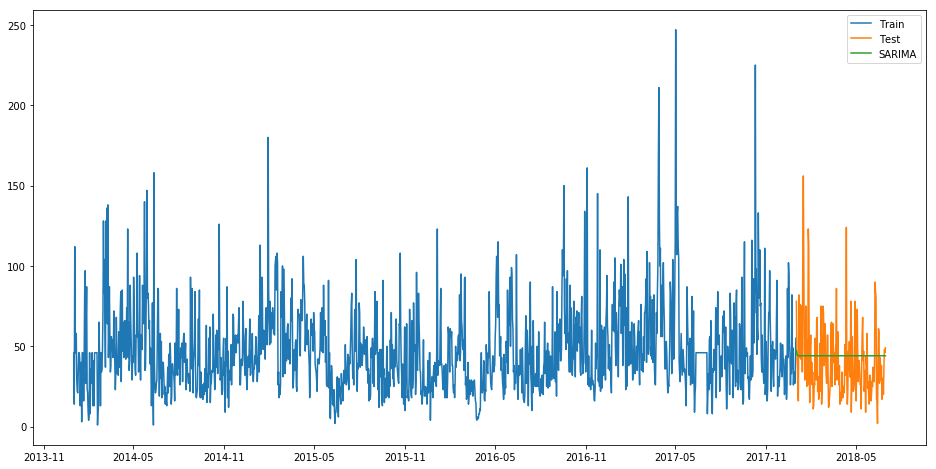

In [129]:
train = data['2014':'2017']
test = data['2018']

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Error, order=(1, 1, 1)).fit()
y_hat_avg['SARIMA'] = fit1.predict( start="2018-01-01", end="2018-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Error'], label='Train')
plt.plot(test['Error'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()



In [130]:
rms = sqrt(mean_squared_error(test.Error, y_hat_avg.SARIMA))
print(rms)

rms_dict['Daily_SARIMA_RMS'] = rms

24.21204039346779


In [184]:
rms_dict

{'Daily_HoltLinearTrend_RMS': 49.41007924939043,
 'Daily_HoltWinters_RMS': 24.52784679789504,
 'Daily_MA_RMS': 24.230756803621368,
 'Daily_Naive_RMS': 25.36005908283896,
 'Daily_SARIMA_RMS': 24.21204039346779,
 'Daily_SA_RMS': 24.8986748071299,
 'Daily_SimpleExponential_RMS': 24.945840700688457}

From the rms values above, we can know that average RMS is 24, SARIMA model is the best result which is 24.21. Holt Linear is the worst result which is 49.41. 


## 3-7: ARIMA 2

### Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF):

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In [91]:
residual = result_decompose.resid
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

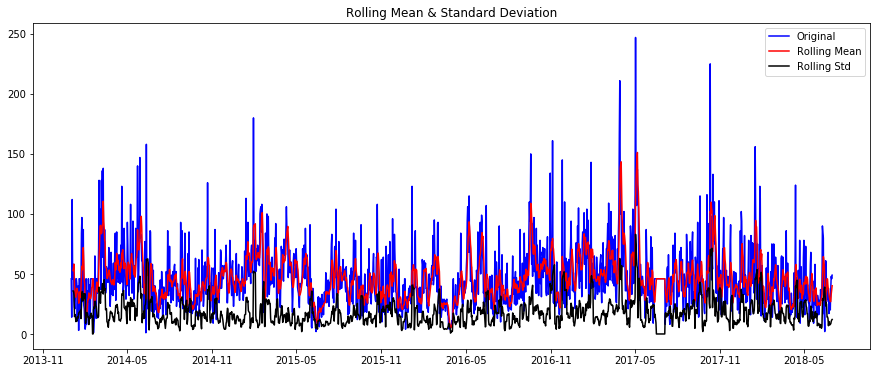

Results of Dickey-Fuller Test:
Test Statistic                -8.731467e+00
p-value                        3.183148e-14
#Lags Used                     8.000000e+00
Number of Observations Used    1.633000e+03
Critical Value (1%)           -3.434361e+00
Critical Value (5%)           -2.863312e+00
Critical Value (10%)          -2.567713e+00
dtype: float64


In [92]:
ts_log_decompose = data['Error']
test_stationarity(ts_log_decompose)

In [93]:
ts_log = np.log(ts_log_decompose)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

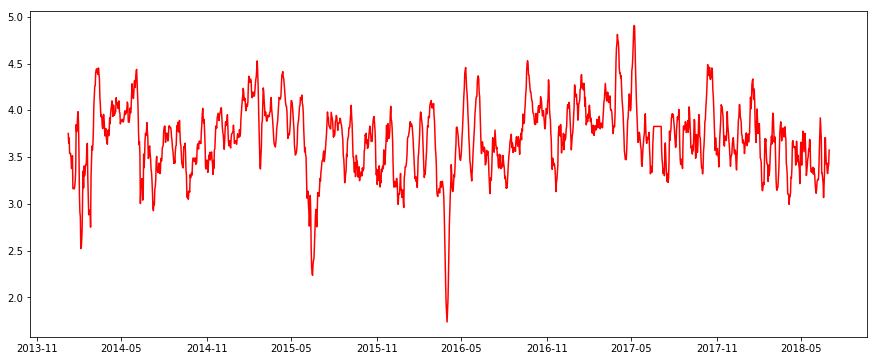

In [158]:
moving_avg = ts_log.rolling(window=7,center=False).mean()
plt.plot(moving_avg, color='red')
#ts_log.plot()


Date
2014-01-07   -0.385735
2014-01-08   -0.556618
2014-01-09   -0.661061
2014-01-10    0.015929
2014-01-11    0.289222
Name: Error, dtype: float64

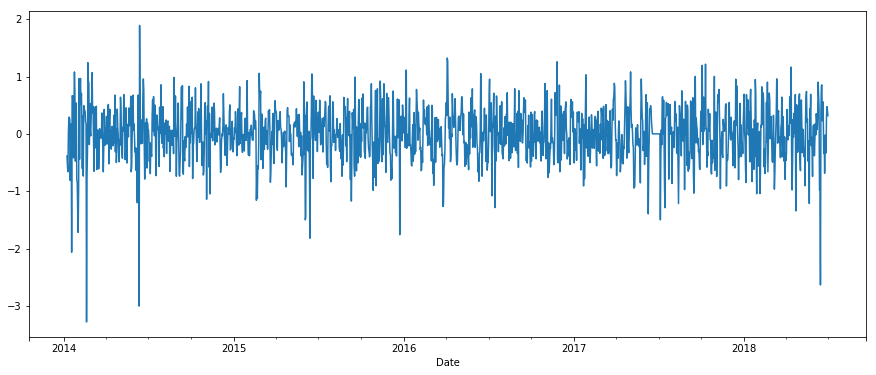

In [159]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.plot()
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

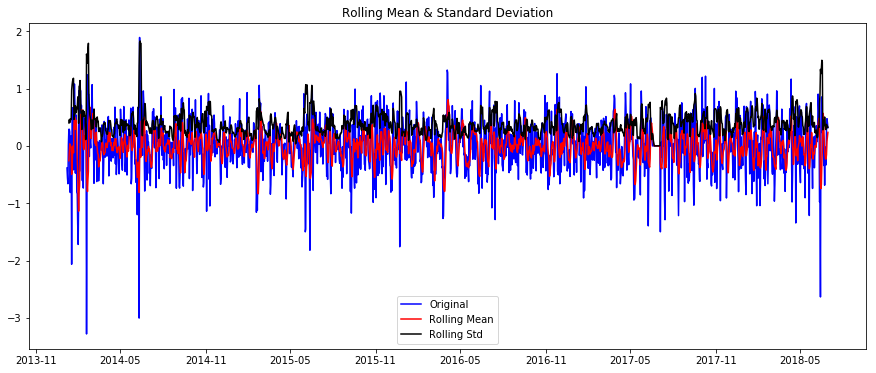

Results of Dickey-Fuller Test:
Test Statistic                -1.178653e+01
p-value                        1.005712e-21
#Lags Used                     2.300000e+01
Number of Observations Used    1.612000e+03
Critical Value (1%)           -3.434413e+00
Critical Value (5%)           -2.863335e+00
Critical Value (10%)          -2.567725e+00
dtype: float64


In [160]:
test_stationarity(ts_log_moving_avg_diff)

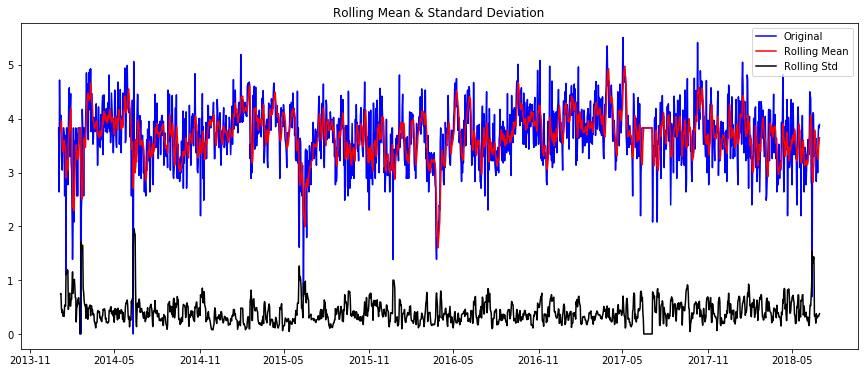

Results of Dickey-Fuller Test:
Test Statistic                -8.160122e+00
p-value                        9.191693e-13
#Lags Used                     8.000000e+00
Number of Observations Used    1.633000e+03
Critical Value (1%)           -3.434361e+00
Critical Value (5%)           -2.863312e+00
Critical Value (10%)          -2.567713e+00
dtype: float64


In [161]:
test_stationarity(ts_log)

## ACF & PACF

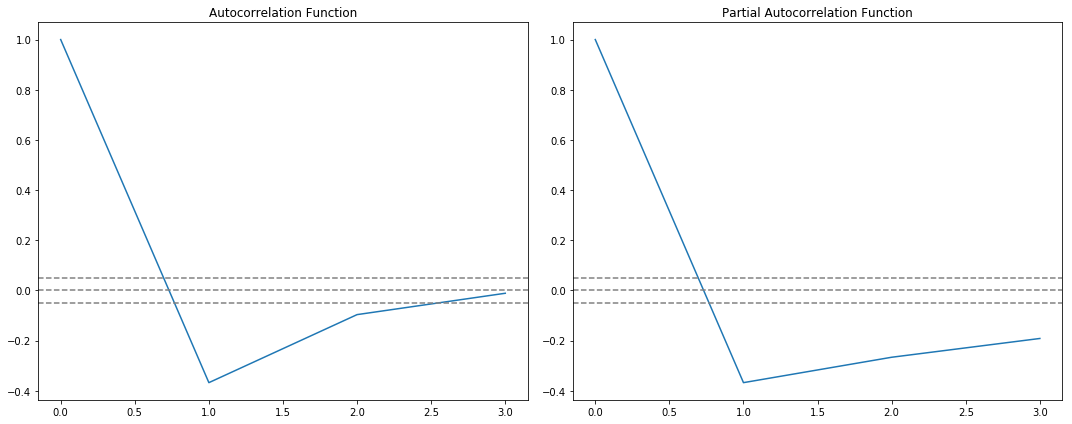

In [162]:
from statsmodels.tsa.arima_model import ARIMA

#ACF and PACF plots:#ACF and 
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=3)
lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.



## AR(p) Model

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 520.7041')

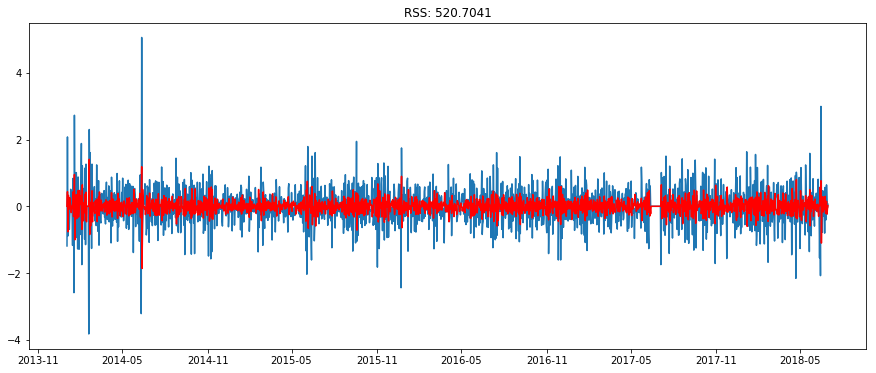

In [163]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2)) #RSS is for the values of residuals and not actual series.

In [164]:
results_AR.fittedvalues.head()

Date
2014-01-02    0.000223
2014-01-03    0.438271
2014-01-04   -0.765276
2014-01-05    0.327921
2014-01-06    0.000305
dtype: float64

In [165]:
ts_log_diff.head()

Date
2014-01-02   -1.189584
2014-01-03    2.079442
2014-01-04   -0.889857
2014-01-05    0.000000
2014-01-06    0.231802
Name: Error, dtype: float64

## MA(q) Model

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 427.3875')

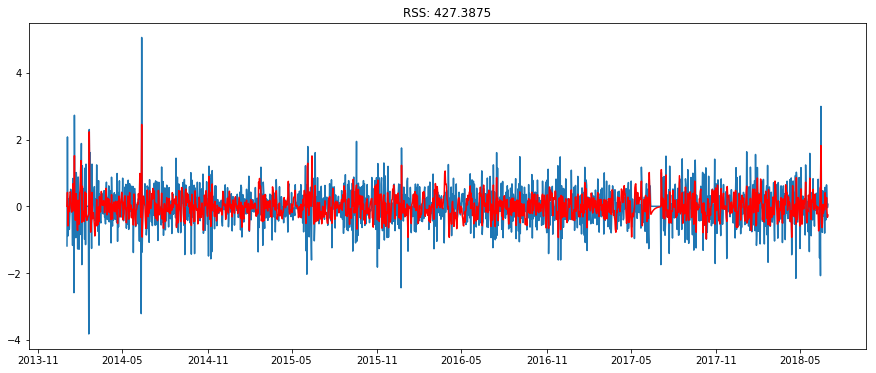

In [166]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2)) #RSS is for the values of residuals and not actual series.

## ARIMA Model

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 425.1530')

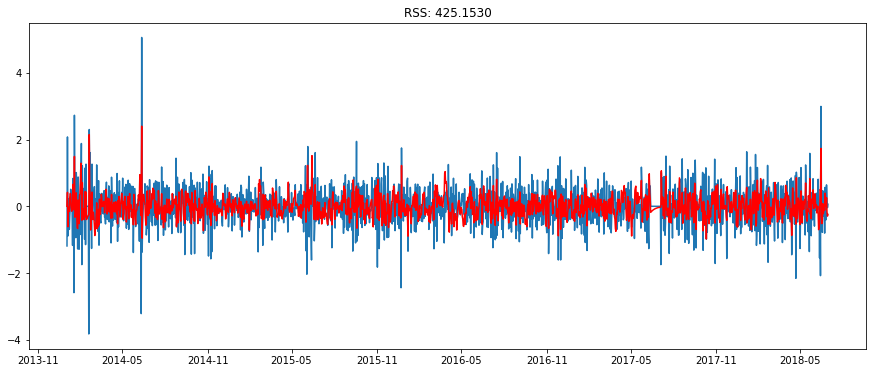

In [167]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2)) #RSS is for the values of residuals and not actual series.



## Convert to original scale:



In [168]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2014-01-02   -0.000017
2014-01-03    0.418300
2014-01-04   -0.613556
2014-01-05   -0.040590
2014-01-06   -0.033086
dtype: float64

In [169]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2014-01-02   -0.000017
2014-01-03    0.418283
2014-01-04   -0.195272
2014-01-05   -0.235863
2014-01-06   -0.268948
dtype: float64

In [170]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2014-01-01    3.828641
2014-01-02    3.828624
2014-01-03    4.246925
2014-01-04    3.633369
2014-01-05    3.592779
dtype: float64

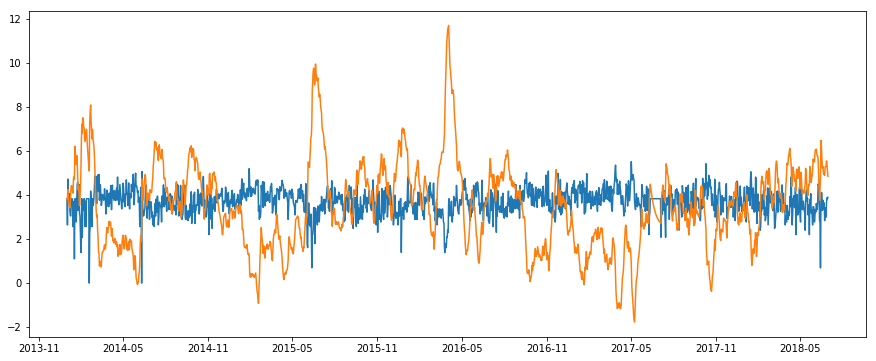

In [171]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 39.7761')

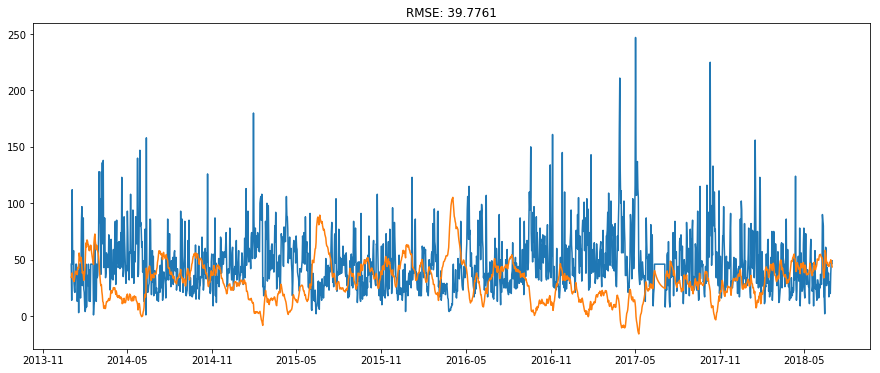

In [172]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA =predictions_ARIMA_log *9 ##T
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

## Confidence Interval

### Daily Confidence Interval

In [173]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA

confidence_interval_dict={}

#train = data['2014':'2017']
#test = data['2018']

size = len(data)-1
train = data[0:size]
test = data[size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()

confidence_interval_dict['daily_confidence_interval'] = \
[
'Expected: %.3f' % test['Error'][0],
'Forecast: %.3f' % forecast,
'Standard Error: %.3f' % stderr,
'95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1])
]

confidence_interval_dict

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


{'daily_confidence_interval': ['Expected: 49.000',
  'Forecast: 39.760',
  'Standard Error: 23.121',
  '95% Confidence Interval: -5.556 to 85.076']}

In [174]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA

size = len(data)-1
train = data[0:size]
test = data[size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=False)
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
	forecast, stderr, conf = model_fit.forecast(alpha=a)
	print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


80.0% Confidence Interval: 39.760 between 10.130 and 69.391
90.0% Confidence Interval: 39.760 between 1.730 and 77.790
95.0% Confidence Interval: 39.760 between -5.556 and 85.076
99.0% Confidence Interval: 39.760 between -19.795 and 99.315


C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tamgs\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


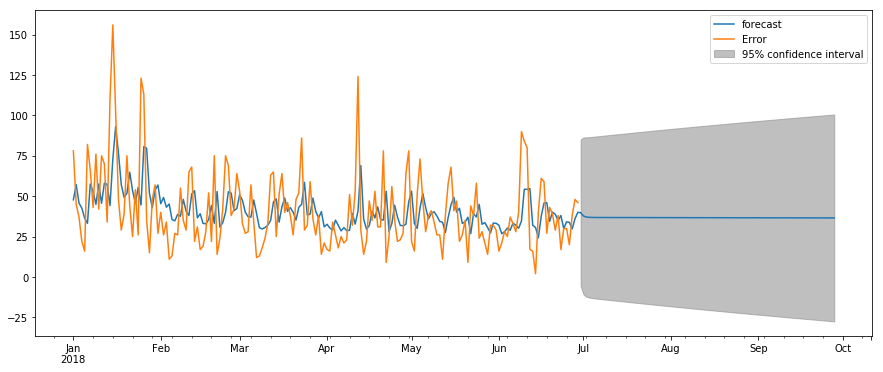

In [175]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

#X = data.values
#X = X.astype('float32')
#size = len(X) - 1
#train, test = X[0:size], X[size:]
size = len(data)-1
train = data[0:size]
test = data[size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=False)
model_fit.plot_predict(len(train)-180, len(train)+90)
#model_fit.plot_predict(1, 500)
pyplot.show()


#print(train.index[0])

## Conclusion

Unable to use time series to have a good forecast on the machine error. The standard error is quite high, which is 23++.

95% confidence Interval shows that from 2018 July to 2018 Oct, the machine error will be between 0 to 100.